In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('spam.csv')
data

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Unnamed: 0,target,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5569,5569,spam,This is the 2nd time we have tried 2 contact u...
5570,5570,ham,Will ü b going to esplanade fr home?
5571,5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,5572,ham,The guy did some bitching but I acted like i'd...


In [2]:
df = data[['target','text']]
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [3]:
for i in df.text:
    print(i)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitl

# 전처리를 전체 데이터 프레임에 적용시키려면 -> 꼭 apply 함수!

In [4]:
import string

# 전처리 하는 함수 생성
def str_punc(x):
    pre_str = []
    for i in x:
        if i not in string.punctuation:
            pre_str.append(i)
    pre_str = ''.join(pre_str)
    return pre_str

In [5]:
df['text'] = df['text'].apply(str_punc)
df

,target,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home
5571,ham,Pity was in mood for that Soany other suggest...
5572,ham,The guy did some bitching but I acted like id ...


In [7]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 5.4 MB/s eta 0:00:00


# nltk에 저장된 데이터

In [10]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('gutenberg')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/t2023-m0093/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [11]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [12]:
shake = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
shake

"[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus. Scoena Prima.\n\nEnter Barnardo and Francisco two Centinels.\n\n  Barnardo. Who's there?\n  Fran. Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar. Long liue the King\n\n   Fran. Barnardo?\n  Bar. He\n\n   Fran. You come most carefully vpon your houre\n\n   Bar. 'Tis now strook twelue, get thee to bed Francisco\n\n   Fran. For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn. Haue you had quiet Guard?\n  Fran. Not a Mouse stirring\n\n   Barn. Well, goodnight. If you do meet Horatio and\nMarcellus, the Riuals of my Watch, bid them make hast.\nEnter Horatio and Marcellus.\n\n  Fran. I thinke I heare them. Stand: who's there?\n  Hor. Friends to this ground\n\n   Mar. And Leige-men to the Dane\n\n   Fran. Giue you good night\n\n   Mar. O farwel honest Soldier, who hath relieu'd you?\n  Fra. Barnardo ha's my place: giue you goodnight.\n\nExit Fran.\n\n  Mar. Holla Barnardo\n\n   Bar. 

# 문장 토큰화

In [14]:
shake_tk = [r.split() for r in df['text']]
shake_tk

[['Go',
  'until',
  'jurong',
  'point',
  'crazy',
  'Available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'Cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['Ok', 'lar', 'Joking', 'wif', 'u', 'oni'],
 ['Free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  'Text',
  'FA',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'rateTCs',
  'apply',
  '08452810075over18s'],
 ['U', 'dun', 'say', 'so', 'early', 'hor', 'U', 'c', 'already', 'then', 'say'],
 ['Nah',
  'I',
  'dont',
  'think',
  'he',
  'goes',
  'to',
  'usf',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['FreeMsg',
  'Hey',
  'there',
  'darling',
  'its',
  'been',
  '3',
  'weeks',
  'now',
  'and',
  'no',
  'word',
  'back',
  'Id',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'Tb',
  'ok',
  'XxX',
  'std',
  'chgs',

## 문자열 데이터를 수치화 하여 시각적인 인사이트 비교

In [15]:
shake_tk_len = [len(w) for w in shake_tk]
# 토큰에 대한 길이 : 단어나 형태소로 나눴을 때 길이
shake_tk_len

[20,
 6,
 28,
 11,
 13,
 32,
 16,
 26,
 26,
 29,
 21,
 26,
 26,
 37,
 8,
 19,
 4,
 19,
 13,
 23,
 8,
 11,
 11,
 20,
 11,
 28,
 5,
 28,
 15,
 12,
 26,
 41,
 6,
 17,
 29,
 28,
 9,
 8,
 4,
 30,
 17,
 28,
 29,
 4,
 13,
 3,
 8,
 5,
 14,
 30,
 12,
 22,
 16,
 55,
 22,
 12,
 27,
 6,
 4,
 7,
 23,
 9,
 6,
 12,
 24,
 28,
 23,
 22,
 15,
 8,
 8,
 5,
 10,
 6,
 5,
 9,
 14,
 11,
 7,
 16,
 4,
 8,
 10,
 9,
 3,
 11,
 26,
 31,
 9,
 7,
 10,
 39,
 26,
 23,
 20,
 29,
 5,
 12,
 37,
 7,
 11,
 21,
 16,
 26,
 36,
 10,
 17,
 10,
 14,
 24,
 6,
 8,
 5,
 24,
 27,
 24,
 30,
 27,
 11,
 15,
 20,
 26,
 8,
 27,
 13,
 7,
 4,
 46,
 5,
 27,
 5,
 2,
 5,
 4,
 25,
 28,
 6,
 8,
 9,
 31,
 20,
 8,
 5,
 26,
 10,
 7,
 10,
 29,
 15,
 6,
 6,
 9,
 15,
 4,
 26,
 80,
 5,
 5,
 32,
 19,
 27,
 24,
 13,
 19,
 24,
 30,
 10,
 27,
 13,
 13,
 10,
 10,
 20,
 6,
 20,
 11,
 14,
 6,
 27,
 16,
 25,
 31,
 6,
 13,
 5,
 4,
 26,
 7,
 24,
 13,
 19,
 10,
 38,
 6,
 22,
 19,
 7,
 6,
 14,
 29,
 7,
 5,
 18,
 23,
 3,
 7,
 13,
 30,
 5,
 13,
 8,
 14,
 6,
 2,
 5,

## 전체 문장에 대한 길이로 수치화 하기

In [16]:
shake_tk_sen_len = [len(s.replace(' ','')) for s in df['text']]
shake_tk_sen_len

[83,
 18,
 122,
 33,
 47,
 108,
 60,
 129,
 126,
 124,
 83,
 103,
 122,
 156,
 26,
 120,
 17,
 58,
 43,
 124,
 33,
 37,
 36,
 66,
 45,
 110,
 25,
 97,
 54,
 49,
 101,
 141,
 23,
 67,
 128,
 89,
 36,
 21,
 18,
 119,
 63,
 94,
 135,
 15,
 48,
 26,
 36,
 25,
 52,
 112,
 45,
 89,
 64,
 221,
 94,
 57,
 122,
 26,
 19,
 31,
 81,
 38,
 20,
 43,
 85,
 122,
 92,
 128,
 59,
 26,
 30,
 24,
 35,
 31,
 13,
 33,
 58,
 37,
 29,
 57,
 17,
 22,
 23,
 28,
 11,
 40,
 92,
 110,
 33,
 30,
 46,
 151,
 114,
 113,
 85,
 122,
 26,
 39,
 134,
 25,
 44,
 59,
 58,
 129,
 140,
 35,
 77,
 32,
 68,
 86,
 22,
 32,
 25,
 69,
 126,
 105,
 112,
 118,
 56,
 66,
 122,
 125,
 43,
 128,
 38,
 30,
 15,
 190,
 17,
 77,
 19,
 6,
 32,
 21,
 96,
 127,
 29,
 26,
 37,
 120,
 54,
 24,
 21,
 122,
 31,
 19,
 38,
 124,
 67,
 25,
 22,
 34,
 44,
 16,
 129,
 289,
 23,
 19,
 117,
 104,
 116,
 91,
 47,
 62,
 116,
 120,
 41,
 125,
 59,
 52,
 45,
 39,
 62,
 26,
 78,
 44,
 51,
 20,
 102,
 50,
 97,
 126,
 16,
 51,
 18,
 22,
 114,
 27,
 122,
 42

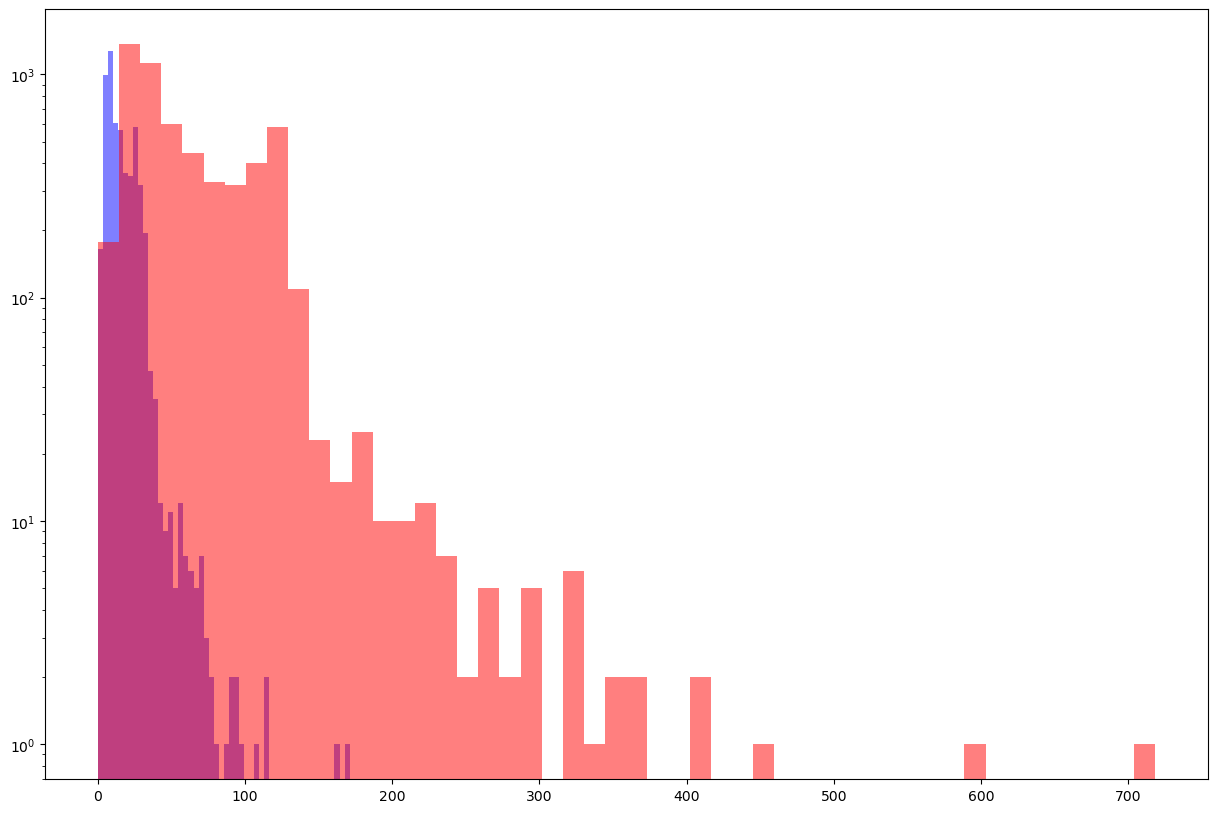

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.hist(shake_tk_len, bins=50, alpha=0.5, color='b', label = 'token')
plt.hist(shake_tk_sen_len,bins=50, alpha=0.5, color = 'r', label = 'all')

plt.yscale('log')
# 토큰화한 길이 vs 전체 문장의 길이를 시각적으로 비교 분석

# 불용어(=의미가 없는 말)(=stopwords) 처리

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/t2023-m0093/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
eng_stop = set(stopwords.words('english'))
eng_stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# 반복문을 이용한 전처리, 정규화

In [24]:
shake_list = list(data.text)

- 정규화를 진행하면 -> 정규식으로도 간단한 전처리가 가능하다.
- 내가 원하는 전처리에서 디테일을 잡으려면 정규식 사용

In [25]:
import re
list_reg = []

for i in data.text:
    text = re.sub('[^a-zA-Z0-9]',' ',i).strip()
    if (text != ''):
        list_reg.append(text)

In [26]:
# 1차 정규식으로 전처리한 데이터 .. 여기서 불용어를 지우기
res_sp = [word for word in list_reg
         if word not in eng_stop]

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/t2023-m0093/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
# 토크나이저를 이용해서 나누기
token_sp = word_tokenize(str(res_sp))
token_sp

['[',
 "'Go",
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 "'",
 ',',
 "'Ok",
 'lar',
 'Joking',
 'wif',
 'u',
 'oni',
 "'",
 ',',
 "'Free",
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'T',
 'C',
 's',
 'apply',
 '08452810075over18',
 's',
 "'",
 ',',
 "'",
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 'U',
 'c',
 'already',
 'then',
 'say',
 "'",
 ',',
 "'Nah",
 'I',
 'don',
 't',
 'think',
 'he',
 'goes',
 'to',
 'usf',
 'he',
 'lives',
 'around',
 'here',
 'though',
 "'",
 ',',
 "'FreeMsg",
 'Hey',
 'there',
 'darling',
 'it',
 's',
 'been',
 '3',
 'week',
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 'I',
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'stil

# 품사 태깅하여 추출하기

In [32]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/t2023-m0093/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [33]:
my_tag_set = ['VB','NN']
my_tk_sp = [word for word, tag in nltk.pos_tag(token_sp)
           if tag in my_tag_set]

my_tk_sp

['point',
 'crazy',
 'bugis',
 'world',
 'la',
 'wif',
 'oni',
 'entry',
 'comp',
 'win',
 'tkts',
 'receive',
 'entry',
 'question',
 'rate',
 's',
 'hor',
 'c',
 'say',
 'think',
 'usf',
 'week',
 's',
 'word',
 'fun',
 'std',
 'chgs',
 'send',
 'rcv',
 'brother',
 'speak',
 'patent',
 'request',
 'callertune',
 'copy',
 'network',
 'customer',
 'receivea',
 'reward',
 'claim',
 'code',
 "'Had",
 'Update',
 'colour',
 'camera',
 'be',
 't',
 'talk',
 'stuff',
 'k',
 'today',
 'win',
 'send',
 'Cost',
 'day',
 'info',
 'week',
 'membership',
 'word',
 'thank',
 'breather',
 'take',
 'help',
 'fulfil',
 'promise',
 'blessing',
 'DATE',
 'use',
 'credit',
 'link',
 'message',
 'click',
 'wap',
 'com',
 'k',
 'm',
 'remember',
 'name',
 'i',
 'v',
 'make',
 'wet',
 "'Fine",
 'way',
 'feel',
 'way',
 'gota',
 'b',
 'v',
 'dont',
 'news',
 'team',
 'name',
 'try',
 'pay',
 'stock',
 'comin',
 'lunch',
 'smth',
 'lor',
 'finish',
 'lunch',
 'way',
 'meet',
 'eat',
 'slice',
 'tho',
 'bus',


In [34]:
sp_cnt = dict()

for word in my_tk_sp:
    sp_cnt[word] = sp_cnt.get(word, 0) +1

sp_cnt
# 해당 토큰들과 숫자를 정리함.

{'point': 12,
 'crazy': 3,
 'bugis': 3,
 'world': 25,
 'la': 5,
 'wif': 13,
 'oni': 2,
 'entry': 25,
 'comp': 11,
 'win': 25,
 'tkts': 2,
 'receive': 29,
 'question': 21,
 'rate': 29,
 's': 138,
 'hor': 2,
 'c': 28,
 'say': 34,
 'think': 36,
 'usf': 5,
 'week': 122,
 'word': 38,
 'fun': 27,
 'std': 6,
 'chgs': 1,
 'send': 123,
 'rcv': 2,
 'brother': 15,
 'speak': 13,
 'patent': 1,
 'request': 8,
 'callertune': 5,
 'copy': 9,
 'network': 25,
 'customer': 43,
 'receivea': 2,
 'reward': 9,
 'claim': 78,
 'code': 13,
 "'Had": 8,
 'Update': 2,
 'colour': 15,
 'camera': 22,
 'be': 370,
 't': 183,
 'talk': 33,
 'stuff': 41,
 'k': 39,
 'today': 125,
 'Cost': 7,
 'day': 202,
 'info': 9,
 'membership': 4,
 'thank': 8,
 'breather': 1,
 'take': 86,
 'help': 49,
 'fulfil': 1,
 'promise': 2,
 'blessing': 2,
 'DATE': 1,
 'use': 32,
 'credit': 11,
 'link': 10,
 'message': 84,
 'click': 3,
 'wap': 5,
 'com': 60,
 'm': 38,
 'remember': 18,
 'name': 41,
 'i': 495,
 'v': 11,
 'make': 56,
 'wet': 2,
 "'Fin

# 워드 클라우드로 시각화

In [37]:
import matplotlib.pyplot as plt

In [35]:
wc = WordCloud(width=500, height=500, scale=2.0, max_font_size=200, background_color='white')
wc

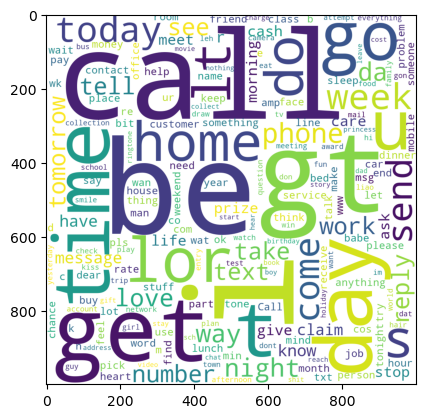

In [40]:
wc.generate_from_frequencies(sp_cnt)
plt.figure()
plt.imshow(wc)


# 워드 클라우드가 어떤 분석에 대한 결과를 보여주는 것보다는 분석 진행하는 과정 중 하나의 소스
# 고객데이터, 리뷰 데이터 등을 가지고 전처리 하면서 어떤 특징들이 있는지 시각화로 보여줄 수 있다.

#### konlpy 한국어 텍스트 분석할 수 있는 패키지
- from konlpy.tag import Hannaum
- from konlpy.tag import Mecab
- from konlpy.tag import Okt
- from konlpy.tag import Kkma